<a href="https://colab.research.google.com/github/gitLamda/GUI-Cal/blob/main/Machine_Learning_model_to_classify_Iris_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_palette("husl")
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving iris.data.csv to iris.data.csv


In [ ]:
import io
col_names=["sepal_length","sepal_width","petal_length","petal_width","class"]
dataset=pd.read_csv(io.BytesIO(uploaded['iris.data.csv']),names=col_names)

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.shape

(150, 5)

In [ ]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **Constructing Violin plot**

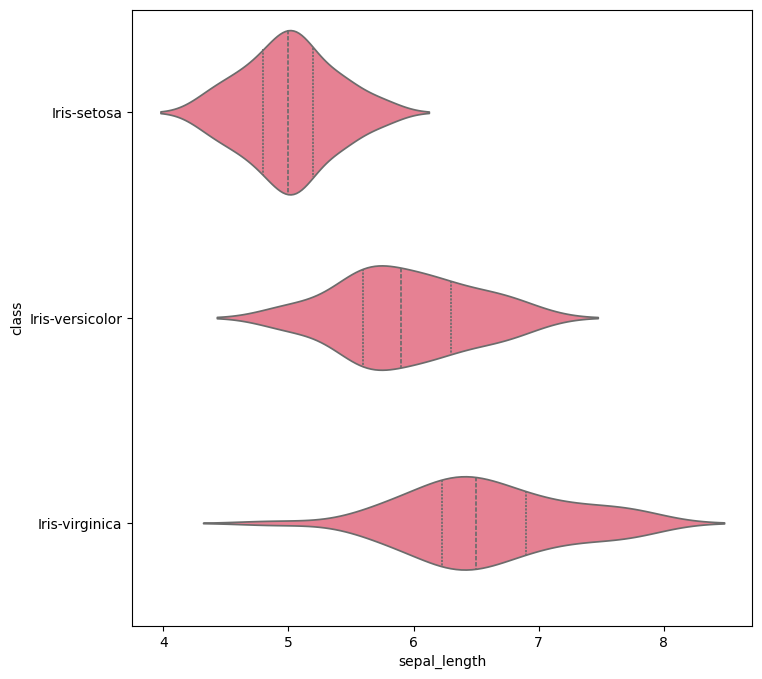

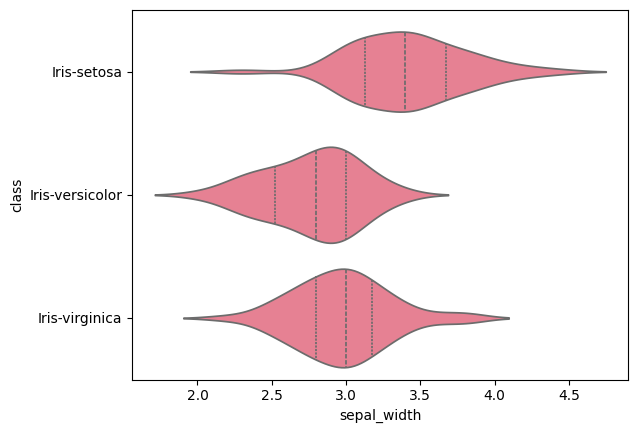

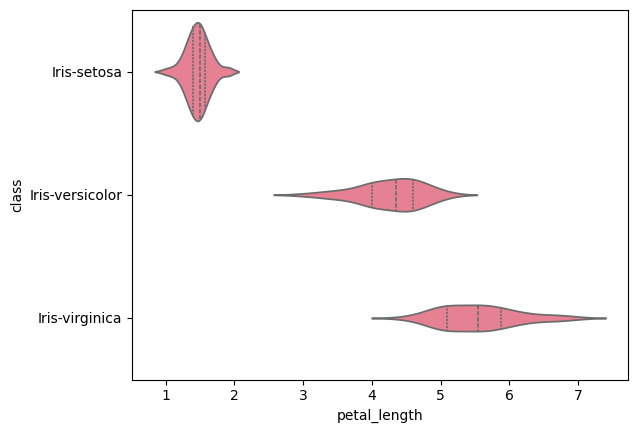

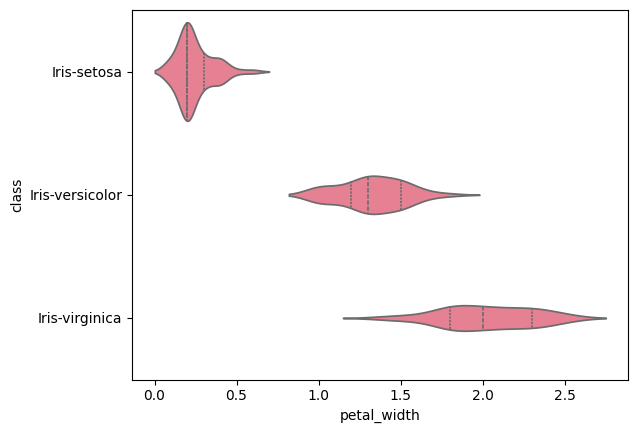

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(y="class",x="sepal_length",data=dataset,inner="quartile")
plt.show()
sns.violinplot(y="class",x="sepal_width",data=dataset,inner="quartile")
plt.show()
sns.violinplot(y="class",x="petal_length",data=dataset,inner="quartile")
plt.show()
sns.violinplot(y="class",x="petal_width",data=dataset,inner="quartile")
plt.show()

# **Correlation Heatmap**

<ipython-input-14-d5bc86586887>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r')


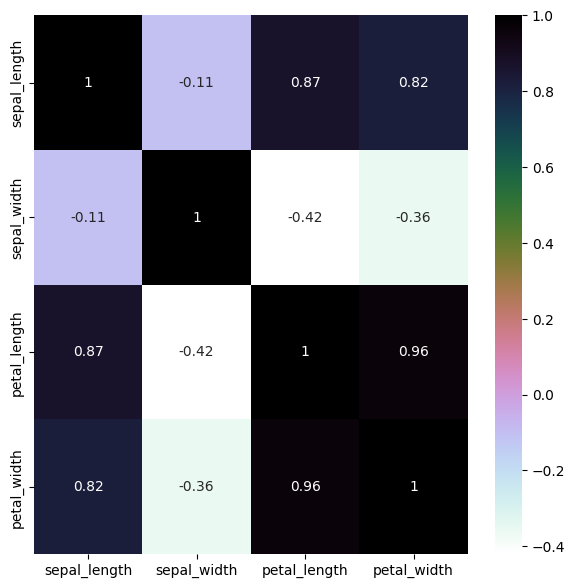

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r')
plt.show()

# **Pair polt**

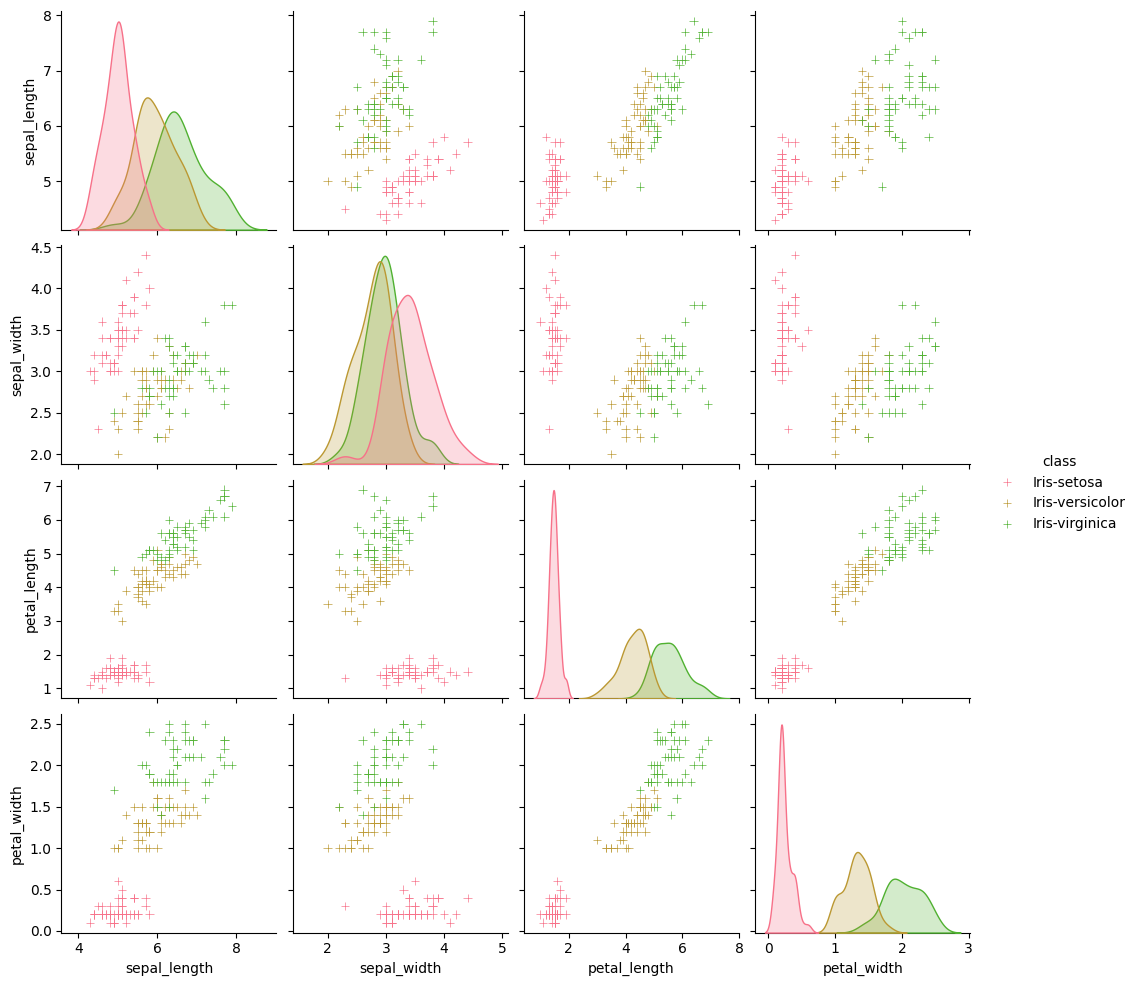

In [ ]:
sns.pairplot(dataset,hue='class',markers='+')
plt.show()

# **Splitting the data to train and test**

In [ ]:
X=dataset.drop(['class'],axis=1)
y=dataset['class']
print(f'X Shape: {X.shape} | y Shape: {y.shape}')

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

X Shape: (150, 4) | y Shape: (150,)


# **Use Support Vector ML model to train the classifier**

In [ ]:
from sklearn.svm import SVC
svn=SVC()
svn.fit(X_train,y_train)

SVC()

# **Evaluate the Classifier**

In [ ]:
predictions=svn.predict(X_test)
accuracy_score(y_test,predictions)

0.9666666666666667

# **Further Evaluate**

In [ ]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



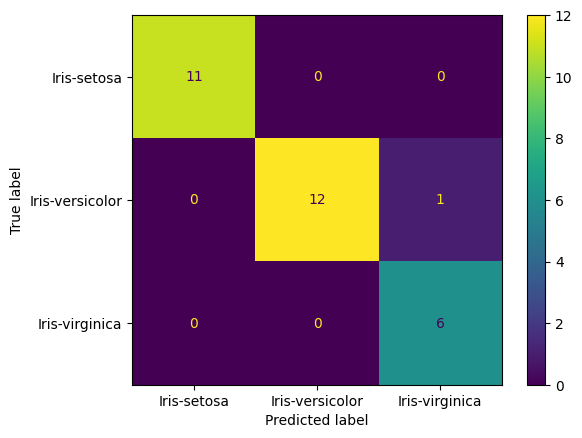

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,predictions)
plt.show()